In [8]:
from __future__ import absolute_import, division, print_function
import math
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import sys
from scipy.spatial.distance import cdist 
import numpy.matlib
import time
from scipy.stats import multivariate_normal
from ModelSetup_local_concentration_d import ModelSetup 
#np.random.seed(seed=5)
from SVN_H import SVN_H_New,SVN_H,SVN_H_full

In [9]:
a = 1.
    
para_dim = 2

#h = 0.1
h = np.ones((para_dim,1))
#h[0] = 0.1
#h[1] = 0.2
for i in range(para_dim):
    h[i] = 0.1*(i+1.)**2

nobs = 10
design = [a,h,para_dim,nobs]
model = ModelSetup(design)

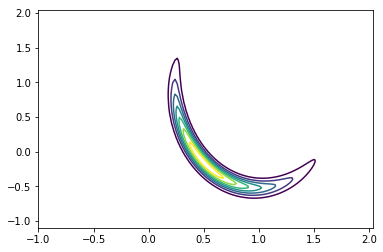

In [10]:
x1 = np.arange(-1,2.05,.02)
x2 = np.arange(-1.1,2.05,.02)
X1,X2 = np.meshgrid(x1, x2)
x_2d = np.array([X1.flatten('F'),X2.flatten('F')])
post_pdf = model.postdcontour(x_2d,np.array([0,1]),1)
post_pdf = np.reshape(post_pdf, (x2.shape[0], x1.shape[0]),order="F")
plt.contour(X1, X2, post_pdf)

In [11]:
N = 300
random_sample = np.random.randn(model.n,N)
x0 = model.prior_m + np.dot(model.prior_C0sqrt,random_sample) 

0 1.9121889483188024 [[-43.8665267]]
1 0.03747171873501973 [[-29.46212972]]
2 0.05174656525718422 [[-20.58342681]]
3 0.036974903415412874 [[-16.02470548]]
4 0.04703826412142774 [[-12.71980349]]
5 0.03258497698895772 [[-11.38836306]]
6 0.027524947156912078 [[-10.9592914]]
7 0.02249557253874119 [[-10.82481271]]
8 0.02009382495906678 [[-10.76644972]]
9 0.01938910660766911 [[-10.73867613]]


(-2, 3)

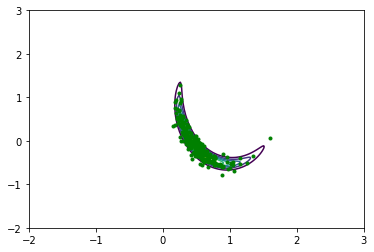

In [12]:
itermax = 10
stepsize = 1
x = x0.copy()
x, stepsize, timeave = SVN_H(x, stepsize, itermax, model)
plt.contour(X1, X2, post_pdf)
plt.plot(x[0,:],  x[1,:], 'g.', 5)
plt.xlim([-2,3])
plt.ylim([-2,3])

0 2.6140227747771374 -194.328253609827
1 0.5529244036489591 -313.5528977813286
2 0.01396435965300476 -131.4829239044721
3 0.18455726170451858 -76.32988160536547
4 0.12017653429691745 -85.6923144446211
5 0.12235226132480938 -78.79795983436688
6 0.05709082660281137 -131.98038221250266
7 0.022747819007518336 -52.25680169065071
8 0.014073628808297009 -33.62843025836378
9 0.018599547525724285 -31.22309931777876


(-2, 3)

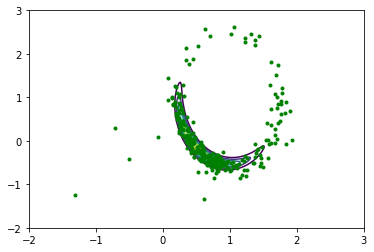

In [13]:
itermax = 10
stepsize = 1
x = x0.copy()
x, stepsize, timeave = SVN_H_New(x, stepsize, itermax, model)
plt.contour(X1, X2, post_pdf)
plt.plot(x[0,:],  x[1,:], 'g.', 5)
plt.xlim([-2,3])
plt.ylim([-2,3])

[ 0.84501137  3.1784553 ] 0 [[-188.60423269]] [ 8.21240274  4.60984489]
[-0.00033385 -0.09518282] 0 [[-43.69887102]] [ 0.55358453 -0.20297841]
[-0.02216835 -0.08258823] 0 [[-18.91780657]] [ 0.29169974 -0.28166631]
[-0.0129203 -0.0603307] 0 [[-10.36023972]] [ 0.19470347 -0.20868129]
[-0.00453683 -0.04107416] 0 [[-8.68164043]] [ 0.16968302 -0.15375269]
[-0.00439165 -0.03425316] 0 [[-8.47718168]] [ 0.0725181  -0.11048502]
[-0.00303565 -0.0284358 ] 0 [[-8.4287159]] [ 0.05037005 -0.09366014]
[-0.0029987  -0.02684646] 0 [[-8.40580498]] [ 0.02007431 -0.08211656]
[-0.00241107 -0.02460162] 0 [[-8.39053535]] [ 0.00952483 -0.07344956]
[-0.0019715  -0.02376008] 0 [[-8.37857334]] [ 0.00326532 -0.06725241]


(-2, 3)

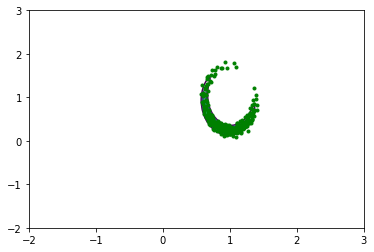

In [6]:
itermax = 10
stepsize = 1
x = x0.copy()
x, stepsize, timeave = SVN_H_full(x, stepsize, itermax, model)
plt.contour(X1, X2, post_pdf)
plt.plot(x[0,:],  x[1,:], 'g.', 5)
plt.xlim([-2,3])
plt.ylim([-2,3])